# Linear Algebra for Data science
## Chapter 12

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [10]:
d = fetch_ucirepo(id=560)

In [15]:
df = d.data.features 

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [39]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday'],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='Rented Bike Count'>

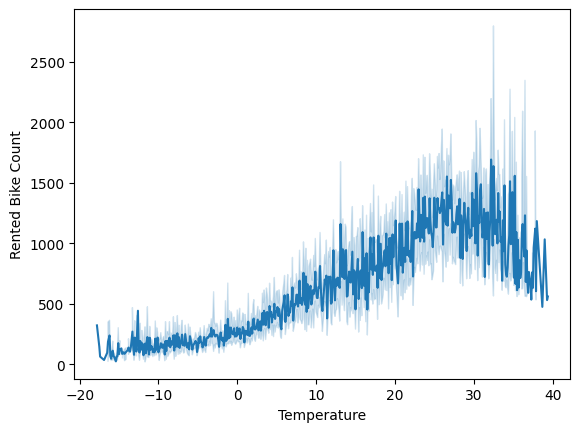

In [19]:
sns.lineplot(data=df, x='Temperature', y='Rented Bike Count')

<AxesSubplot:>

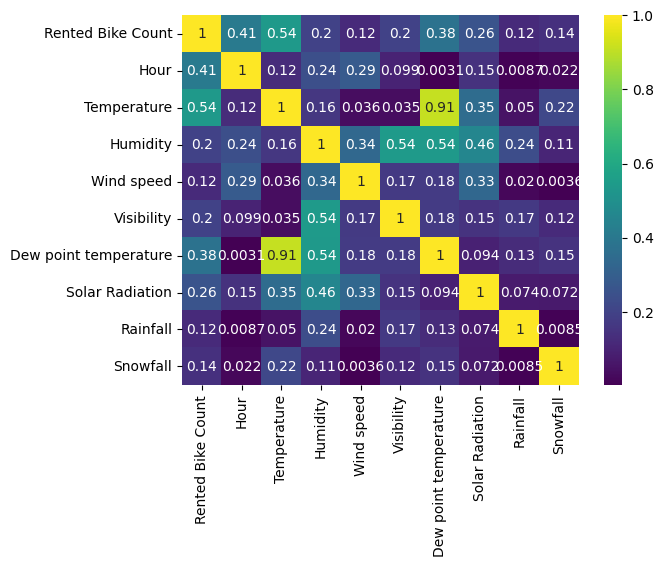

In [31]:
sns.heatmap(df.corr().abs(), cmap='viridis', annot=True)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

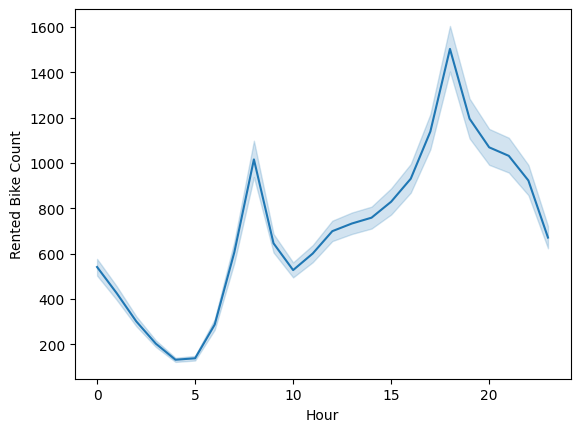

In [32]:
sns.lineplot(data=df, x='Hour', y='Rented Bike Count')

<AxesSubplot:xlabel='Temperature', ylabel='Dew point temperature'>

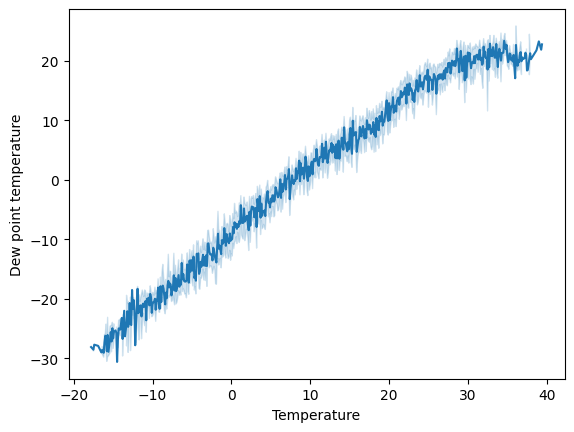

In [40]:
sns.lineplot(data=df, x='Temperature', y='Dew point temperature')

In [42]:
# First, let's find linear model for temperature and dew point temperature

X = sm.add_constant(df['Temperature'].copy())
Y = df['Dew point temperature']

In [49]:
model_t = sm.OLS(Y, X)
results_t = model_t.fit()
results_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                 2.397e+04
Date:                   Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                           18:45:00   Log-Likelihood:                -26758.
No. Observations:                   8760   AIC:                         5.352e+04
Df Residuals:                       8757   BIC:                         5.354e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.5505      0.117    -56.095      0.000      -6.779      -6.322
Temperature     1.0132      0.005    218.947      0.000       1.004       1.022
Hour           -0.2112      0.008    -26.453      0.000      -0.227      -0.196
==============================================================================
Omnibus:                      314.409   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.424
Skew:                          -0.486   Prob(JB):                     2.19e-76
Kurtosis:                       3.097   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Linear regression for Temperature and Hour

X = sm.add_constant(df[['Temperature', 'Hour']].copy())

In [51]:
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                 2.397e+04
Date:                   Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                           18:45:03   Log-Likelihood:                -26758.
No. Observations:                   8760   AIC:                         5.352e+04
Df Residuals:                       8757   BIC:                         5.354e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.5505      0.117    -56.095      0.000      -6.779      -6.322
Temperature     1.0132      0.005    218.947      0.000       1.004       1.022
Hour           -0.2112      0.008    -26.453      0.000      -0.227      -0.196
==============================================================================
Omnibus:                      314.409   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.424
Skew:                          -0.486   Prob(JB):                     2.19e-76
Kurtosis:                       3.097   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Linear regression for wind speed, solar radiation (bad model)

X = sm.add_constant(df[['Wind speed', 'Solar Radiation']].copy())

bad_model = sm.OLS(Y, X)
bad_results = bad_model.fit()
bad_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Dew point temperature   R-squared:                       0.057
Model:                               OLS   Adj. R-squared:                  0.057
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Mon, 19 Aug 2024   Prob (F-statistic):          2.84e-113
Time:                           18:48:18   Log-Likelihood:                -34680.
No. Observations:                   8760   AIC:                         6.937e+04
Df Residuals:                       8757   BIC:                         6.939e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.6812      0.264     29.150      0.000       7.165       8.198
Wind speed         -2.9446      0.139    -21.241      0.000      -3.216      -2.673
Solar Radiation     2.5860      0.165     15.638      0.000       2.262       2.910
==============================================================================
Omnibus:                      736.688   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.028
Skew:                          -0.239   Prob(JB):                     2.60e-66
Kurtosis:                       2.226   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""